In [16]:
import pandas as pd

df = pd.read_csv("./data.csv")
df

,Career Fair Name,Career Fair Session Start Date,Student Attendees Email - Institution,Student Attendees First Name,Student Attendees Last Name,Student Attendee Colleges Name,Student Attendee School Years Name,Student Attendees ID,Student Attendees Gender,Student Attendees Ethnicity,Student Attendee Work Authorizations Name,Student Attendee Majors Name List,Student Attendee Institution Labels Name List
0,Fall 2024 ADMIT UCLA: Graduate & Professional ...,10/24/2024,bruinclaphoney@ucla.edu,SUHEON,PARK,LIFE SCIENCE,Senior,49110668,Man,Foreign,Student (F-1) Visa,Cognitive Science,"event access, bachelor of science"
1,Fall 2024 ADMIT UCLA: Graduate & Professional ...,10/24/2024,kchang809@gmail.com,KRISTY,CHANG,SOCIAL SCIENCE,Senior,31328801,Woman,Asian Or Pacific Islander,U.S. Citizen,Communication,"bachelor of arts, event access"
2,Fall 2024 ADMIT UCLA: Graduate & Professional ...,10/24/2024,sahel2679@g.ucla.edu,SAHEL,HAZEGHSA,LIFE SCIENCE,Alumni,41836983,Woman,White Non Hispanic,U.S. Citizen,Biology,"bachelor of science, event access"
3,Fall 2024 ADMIT UCLA: Graduate & Professional ...,10/24/2024,sofiathanos@ucla.edu,SOFIA,THANOPOULOS,HUMANITIES,Senior,48952450,Woman,White Non Hispanic,U.S. Citizen,Art History,"bachelor of arts, event access"
4,Fall 2024 ADMIT UCLA: Graduate & Professional ...,10/24/2024,harbaksh@ucla.edu,HARBAKSH,KAUR,SOCIAL SCIENCE,Senior,24760227,Woman,Asian Or Pacific Islander,U.S. Citizen,Political Science,"bachelor of arts, event access"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Fall 2024 UBS@UCLA Consulting Night,9/30/2024,aionescu2@ucla.edu,AMELIE,IONESCU,SOCIAL SCIENCE,Senior,31523428,Woman,Unknown,U.S. Citizen,Economics,"event access, bachelor of arts"
4996,Fall 2024 UBS@UCLA Consulting Night,9/30/2024,samueloh@ucla.edu,SAMUEL,OH,PHYSICAL SCIENCE,Sophomore,31522700,Man,Foreign,Student (F-1) Visa,PREAPPLIED MATHEMATICS,"event access, bachelor of science"
4997,Fall 2024 UBS@UCLA Consulting Night,9/30/2024,radhika.m.krsna@gmail.com,RADHIKA,MEHRA,INTERNATIONAL INSTITUTE,Alumni,41276022,Woman,Foreign,Student (F-1) Visa,International Development Studies,"event block, ocr block, in, appointment block,..."
4998,Fall 2024 UBS@UCLA Consulting Night,9/30/2024,nelseq.2021@gmail.com,NELSON,SEQUEIRA,SOCIAL SCIENCE,Junior,58020407,Man,Hispanic,U.S. Citizen,PREECONOMICS,"bachelor of arts, event access"


In [2]:
df["Student Attendee School Years Name"].value_counts()

Senior                  1731
Junior                  1073
Masters                 1044
Sophomore                489
Freshman                 267
Doctorate                231
Alumni                   100
Postdoctoral Studies      25
Name: Student Attendee School Years Name, dtype: int64

In [8]:
df["Career Fair Name"].value_counts()

Fall 2024 UCLA STEM Fair (In-Person) â€“ Formerly known as "E&T Fair"          1963
Fall 2024 HIRE UCLA (In-Person): Job & Internship Fair                         1418
UCLA STEM Grad Student and Postdoc Employer Networking Luncheon - Fall 2024     395
Fall 2024 ADMIT UCLA: Graduate & Professional School Fair                       312
Fall 2024 UBS@UCLA Consulting Night                                             297
Fall 2024 UBS@UCLA  Financial Services Night                                    274
Fall 2024 UCLA Virtual STEM Fair                                                238
UCLA Virtual Public Health Employer Showcase 2024                                81
Fall 2024 UCLA Employer Resume Day - Hybrid/Open Industry Edition                22
Name: Career Fair Name, dtype: int64

Fall 2024 HIRE UCLA (In-Person): Job & Internship Fair


/var/folders/q3/z0pdr58n4bn46rs6tvs5t1y00000gn/T/ipykernel_15471/2993669281.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Education_Level'] = filtered_data['Education_Level'].fillna('Other').astype(str)
/var/folders/q3/z0pdr58n4bn46rs6tvs5t1y00000gn/T/ipykernel_15471/2993669281.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Education_Class'] = filtered_data['Education_Level'].apply(classify_education_level)


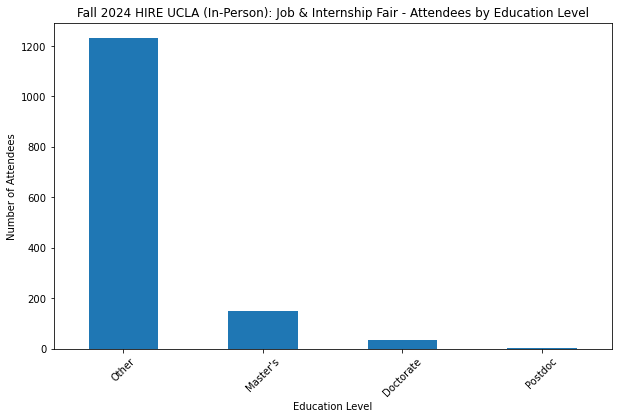

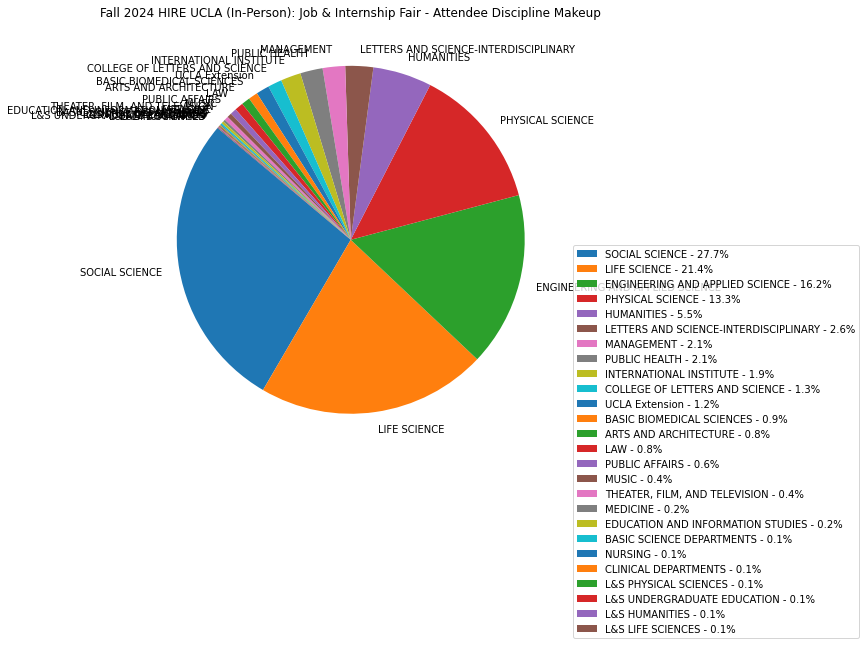

Fall 2024 UCLA STEM Fair (In-Person) â€“ Formerly known as "E&T Fair"


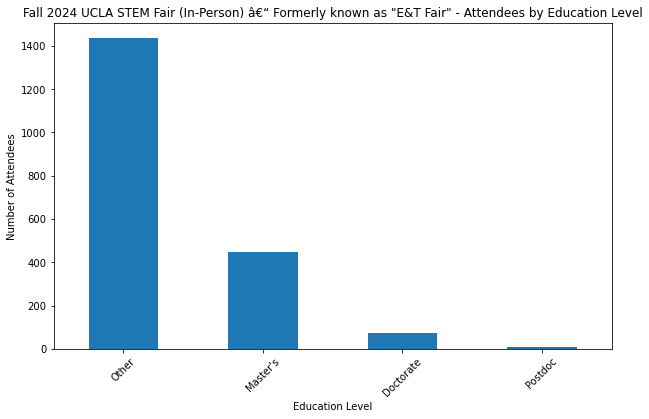

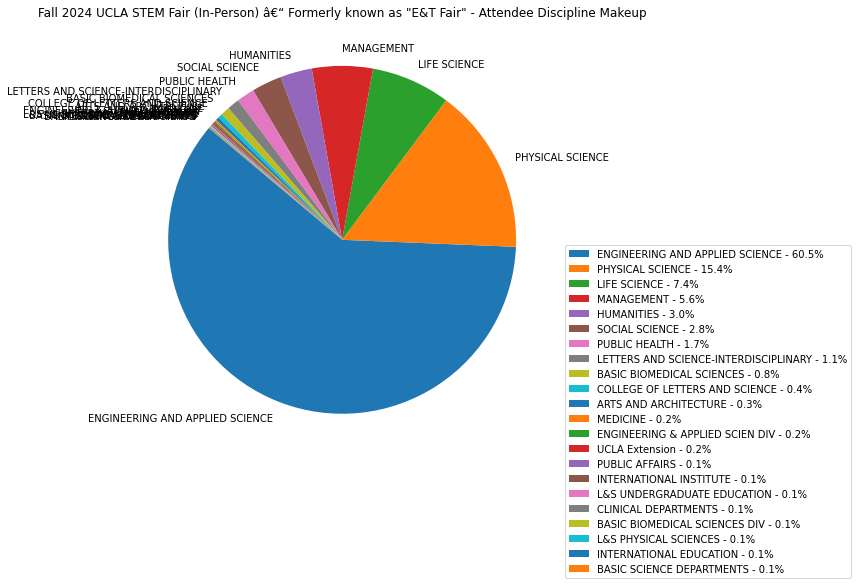

Fall 2024 UCLA Virtual STEM Fair


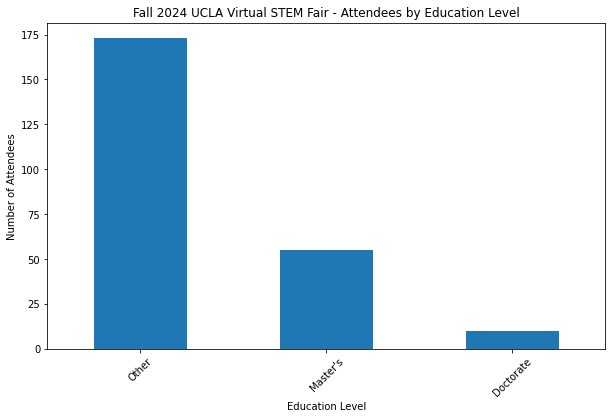

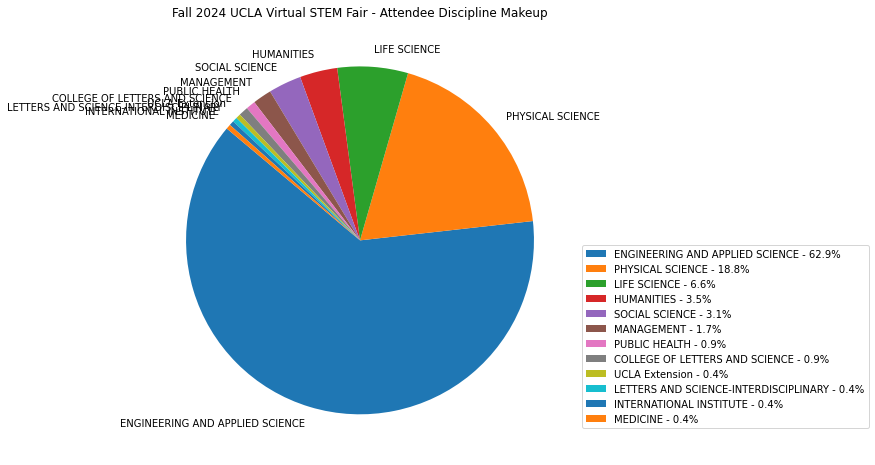

UCLA STEM Grad Student and Postdoc Employer Networking Luncheon - Fall 2024


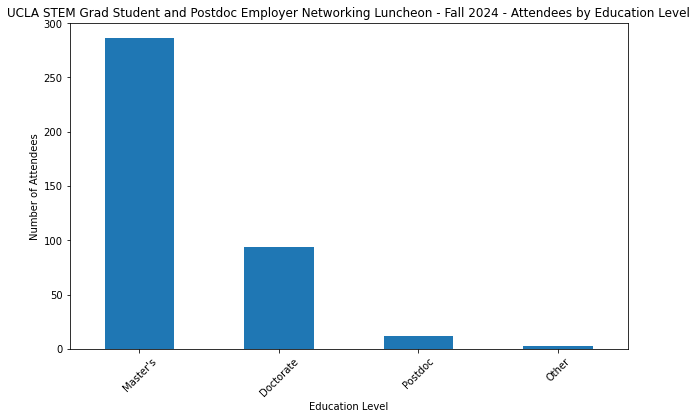

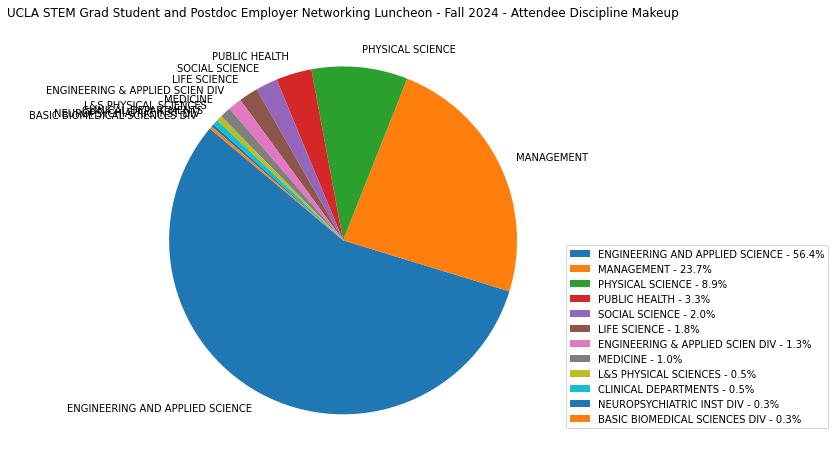

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("./data.csv")

# Rename relevant columns for clarity
data = data.rename(columns={
    'Career Fair Name': 'Fair',
    'Student Attendee School Years Name': 'Education_Level',
    'Student Attendee Colleges Name': 'Discipline'
})

# Define the exact list of target fairs
target_fairs = [
    "Fall 2024 UCLA STEM Fair (In-Person) â€“ Formerly known as \"E&T Fair\"",
    "UCLA STEM Grad Student and Postdoc Employer Networking Luncheon - Fall 2024",
    "Fall 2024 HIRE UCLA (In-Person): Job & Internship Fair",
    "Fall 2024 UCLA Virtual STEM Fair"
]

# Filter data for exact matches to the fairs listed in target_fairs
filtered_data = data[data['Fair'].isin(target_fairs)]

# Function to classify education levels (Master's, Doctoral, Postdoc, Others)
def classify_education_level(level):
    if "Master" in level:
        return "Master's"
    elif "Doctorate" in level:
        return "Doctorate"
    elif "Postdoc" in level:
        return "Postdoc"
    else:
        return "Other"  # Includes undergraduate, alumni, and others

# Handle missing or non-string values in the 'Education_Level' column
filtered_data['Education_Level'] = filtered_data['Education_Level'].fillna('Other').astype(str)
filtered_data['Education_Class'] = filtered_data['Education_Level'].apply(classify_education_level)

# Group by each fair to generate the required charts for each
fair_groups = filtered_data.groupby('Fair')

# Generating charts with updated legends for each specified fair
for fair_name, group in fair_groups:
    print(fair_name)
    
    # Count of attendees by education level
    edu_counts = group['Education_Class'].value_counts()
    total_attendees = edu_counts.sum()
    
    # Count of attendees by discipline
    discipline_counts = group['Discipline'].value_counts(normalize=True) * 100  # Convert to percentage
    
    # Plotting the bar chart for education level distribution
    plt.figure(figsize=(10, 6))
    edu_counts.plot(kind='bar')
    plt.title(f'{fair_name} - Attendees by Education Level')
    plt.xlabel('Education Level')
    plt.ylabel('Number of Attendees')
    plt.xticks(rotation=45)
    plt.show()
    
    # Plotting the pie chart for discipline distribution with legend showing percentages
    plt.figure(figsize=(8, 8))
    discipline_counts.plot(kind='pie', startangle=140)
    plt.title(f'{fair_name} - Attendee Discipline Makeup')
    plt.ylabel('')
    
    # Create legend with percentages
    legend_labels = [f"{disc} - {pct:.1f}%" for disc, pct in zip(discipline_counts.index, discipline_counts.values)]
    plt.legend(legend_labels, loc='best', bbox_to_anchor=(1, 0.5))
    plt.show()


Fall 2024 HIRE UCLA (In-Person): Job & Internship Fair


/var/folders/q3/z0pdr58n4bn46rs6tvs5t1y00000gn/T/ipykernel_15471/1892310566.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Education_Level'] = filtered_data['Education_Level'].fillna('').astype(str)
/var/folders/q3/z0pdr58n4bn46rs6tvs5t1y00000gn/T/ipykernel_15471/1892310566.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Education_Class'] = filtered_data['Education_Level'].apply(classify_education_level)


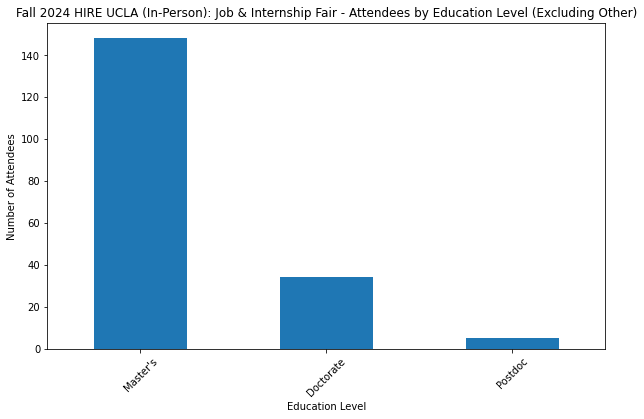

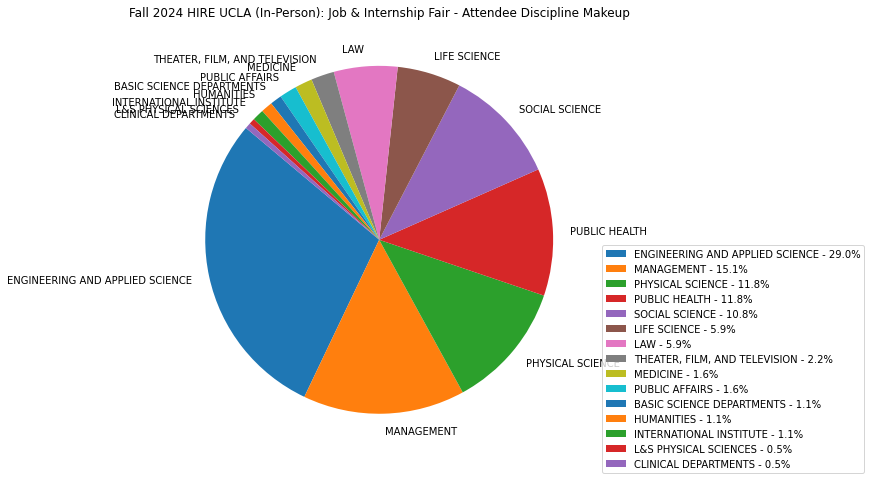

Fall 2024 UCLA STEM Fair (In-Person) â€“ Formerly known as "E&T Fair"


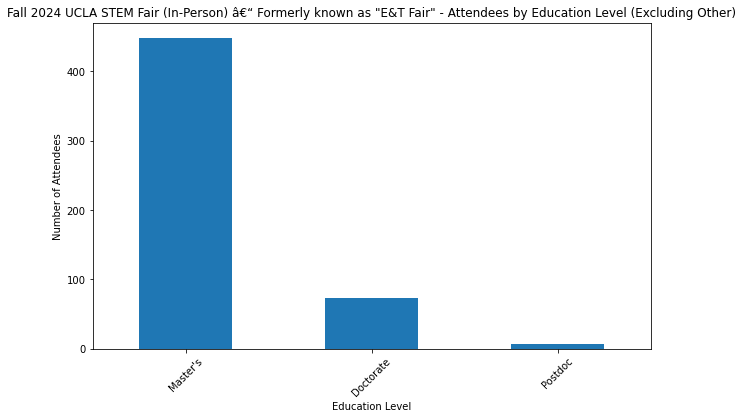

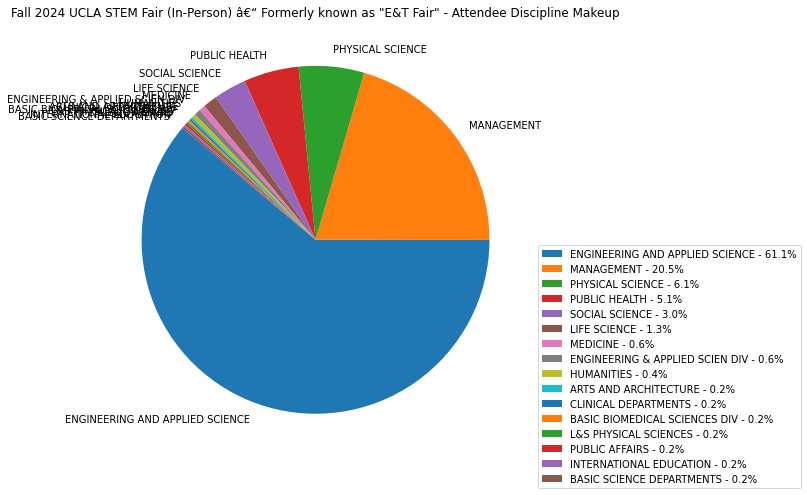

Fall 2024 UCLA Virtual STEM Fair


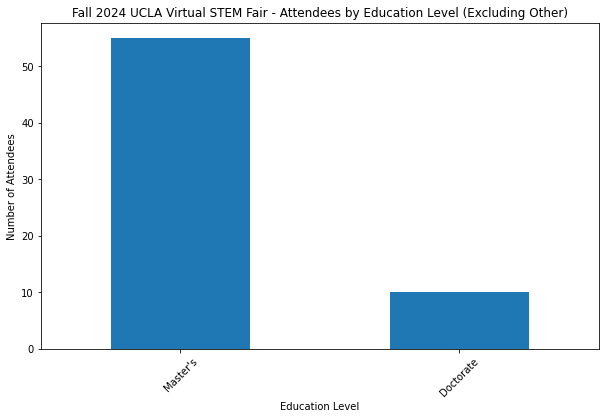

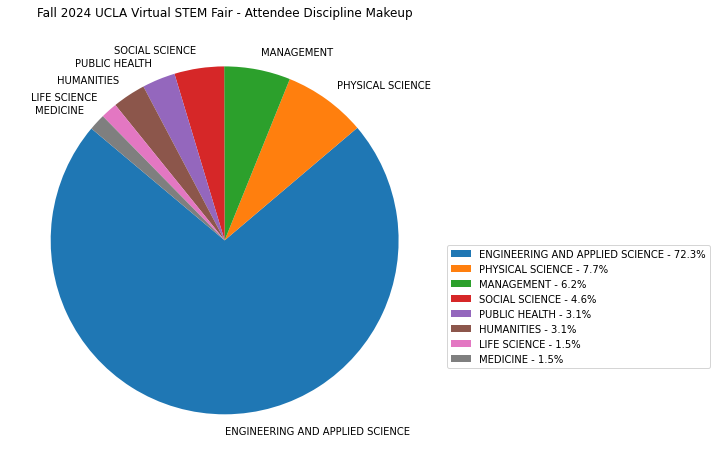

UCLA STEM Grad Student and Postdoc Employer Networking Luncheon - Fall 2024


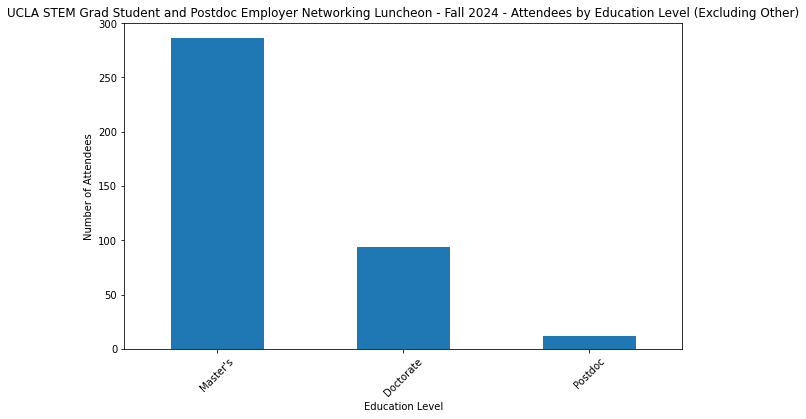

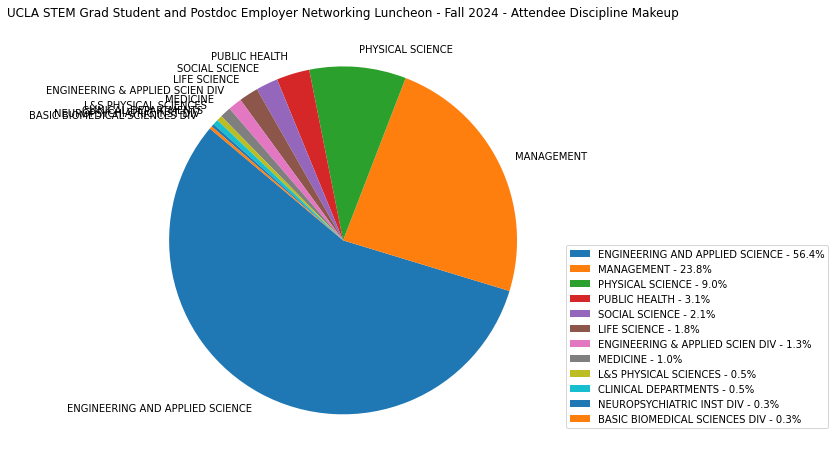

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("./data.csv")

# Rename relevant columns for clarity
data = data.rename(columns={
    'Career Fair Name': 'Fair',
    'Student Attendee School Years Name': 'Education_Level',
    'Student Attendee Colleges Name': 'Discipline'
})

# Define the exact list of target fairs
target_fairs = [
    "Fall 2024 UCLA STEM Fair (In-Person) â€“ Formerly known as \"E&T Fair\"",
    "UCLA STEM Grad Student and Postdoc Employer Networking Luncheon - Fall 2024",
    "Fall 2024 HIRE UCLA (In-Person): Job & Internship Fair",
    "Fall 2024 UCLA Virtual STEM Fair"
]

# Filter data for exact matches to the fairs listed in target_fairs
filtered_data = data[data['Fair'].isin(target_fairs)]

# Function to classify education levels (Master's, Doctoral, Postdoc, omit Others)
def classify_education_level(level):
    if "Master" in level:
        return "Master's"
    elif "Doctorate" in level:
        return "Doctorate"
    elif "Postdoc" in level:
        return "Postdoc"
    else:
        return None  # Omitting 'Other' category

# Handle missing or non-string values in the 'Education_Level' column
filtered_data['Education_Level'] = filtered_data['Education_Level'].fillna('').astype(str)
filtered_data['Education_Class'] = filtered_data['Education_Level'].apply(classify_education_level)

# Filter out rows where Education_Class is None (Other category)
filtered_data = filtered_data[filtered_data['Education_Class'].notnull()]

# Group by each fair to generate the required charts for each
fair_groups = filtered_data.groupby('Fair')

# Generating charts with updated legends for each specified fair
for fair_name, group in fair_groups:
    print(fair_name)
    
    # Count of attendees by education level, excluding 'Other'
    edu_counts = group['Education_Class'].value_counts()
    total_attendees = edu_counts.sum()
    
    # Count of attendees by discipline
    discipline_counts = group['Discipline'].value_counts(normalize=True) * 100  # Convert to percentage
    
    # Plotting the bar chart for education level distribution
    plt.figure(figsize=(10, 6))
    edu_counts.plot(kind='bar')
    plt.title(f'{fair_name} - Attendees by Education Level (Excluding Other)')
    plt.xlabel('Education Level')
    plt.ylabel('Number of Attendees')
    plt.xticks(rotation=45)
    plt.show()
    
    # Plotting the pie chart for discipline distribution with legend showing percentages
    plt.figure(figsize=(8, 8))
    discipline_counts.plot(kind='pie', startangle=140)
    plt.title(f'{fair_name} - Attendee Discipline Makeup')
    plt.ylabel('')
    
    # Create legend with percentages
    legend_labels = [f"{disc} - {pct:.1f}%" for disc, pct in zip(discipline_counts.index, discipline_counts.values)]
    plt.legend(legend_labels, loc='best', bbox_to_anchor=(1, 0.5))
    plt.show()
